In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from joblib import dump
%matplotlib inline
from sklearn.metrics import mean_squared_error
np.random.seed(42)
from sklearn import neighbors
from math import sqrt

In [2]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive')
gdrive_path = os.getcwd()

Mounted at /content/drive


In [3]:
path = Path.cwd() / "FOM_MA" / "data" / "train_set.csv"

In [ ]:
## Data understanding

In [4]:
df = pd.read_csv(path)
## Data preparation
df_amount_0 = df[ df['Claim_Amount'] == 0 ] 

df = df.drop(df_amount_0.index, axis=0) 

df = df.replace('?', np.nan)
df = df.dropna()

df.reset_index() 
df.index =range(len(df))

#deleting the columns 'Row_ID','Household_ID' from the dataframe as it is a unique and does not have any effect on the algorithm
del df['Row_ID']
del df['Household_ID']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.sample(10)

,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
22664,1,2005,2002,Y,Y.29,Y.29.0,B,C,A,A,A,D,C,B,B,A,B,E,4,-0.119519,-0.124506,0.217908,-0.191039,0.527193,-0.326155,-0.665021,-0.222398,O,-0.23153,-0.266117,-0.272337,6.388802,2367.536000
5676,1,2007,2000,Y,Y.10,Y.10.0,B,C,A,A,A,C,C,B,B,A,F,C,2,-0.633757,-1.248430,-0.962249,-1.290430,-0.620605,-1.065412,-0.984499,-0.913766,L,-0.23153,-0.266117,-0.272337,-0.251419,19.187940
10356,1,2007,2005,AY,AY.37,AY.37.12,A,C,B,A,A,D,C,A,A,A,E,F,5,0.009041,2.555621,-0.175477,2.430584,0.152523,0.432987,-0.640446,2.047522,O,-0.23153,-0.266117,-0.272337,-0.251419,4.632515
9463,1,2005,2001,K,K.7,K.7.1,B,C,A,A,A,B,C,C,B,A,A,F,2,-0.545372,-0.937190,-0.453161,-0.985983,-0.156728,-0.688765,-0.935349,-0.282783,N,-0.23153,-0.266117,-0.272337,1.961988,46.386800
428,2,2006,2005,BT,BT.43,BT.43.4,A,C,B,A,A,B,C,B,A,A,D,C,4,-0.408778,-0.332000,-0.939108,-0.394004,-0.769284,-0.393998,-0.935349,0.773085,M,-0.23153,-0.266117,-0.272337,-0.251419,51.529690
22020,1,2006,1998,Y,Y.10,Y.10.2,B,C,A,A,A,C,C,B,B,A,A,C,2,-0.633757,-0.643240,-0.962249,-0.698450,-0.620605,-1.119218,-0.984499,-1.006204,L,-0.23153,-0.266117,4.209404,-0.251419,127.692000
4194,1,2006,2000,Y,Y.29,Y.29.2,B,C,B,A,A,D,C,B,B,A,A,B,4,-0.119519,0.221317,0.217908,0.147235,0.527193,-0.231408,-0.640446,-0.332338,N,-0.23153,2.783616,-0.272337,-0.251419,168.881700
22332,1,2006,2002,P,P.2,P.2.0,A,C,B,A,A,B,C,B,A,B,B,B,4,-0.392708,0.394228,-0.175477,0.485509,-0.002102,-0.172923,-0.665021,1.003906,O,-0.23153,-0.266117,-0.272337,-0.251419,14.432390
25680,7,2006,2005,BU,BU.38,BU.38.1,F,C,A,C,A,B,B,A,B,A,B,B,4,-0.481093,0.048405,-0.615144,-0.021902,0.152523,-0.268839,-0.947636,0.379268,J,-0.23153,-0.266117,4.209404,-0.251419,1.283590
21985,3,2007,2005,AU,AU.14,AU.14.2,B,C,A,A,A,B,C,A,B,A,C,B,4,-0.143623,1.085874,-0.383740,1.162057,0.069263,-0.638467,-0.591295,-0.218022,L,-0.23153,-0.266117,-0.272337,-0.251419,2.840970


In [6]:
df.shape

(28079, 33)

In [7]:
# Check the boolean characterics
print('Values of Vehicle:       {}'.format(df['Vehicle'].unique()))
print('Values of Calendar_Year:  {}'.format(df['Calendar_Year'].unique()))
print('Values of Model_Year: {}'.format(df['Model_Year'].unique()))
print('Values of Blind_Make:     {}'.format(df['Blind_Make'].unique()))
print('Values of Blind_Model:       {}'.format(df['Blind_Model'].unique()))
print('Values of Blind_Submodel:  {}'.format(df['Blind_Submodel'].unique()))
print('Values of Cat1:       {}'.format(df['Cat1'].unique()))
print('Values of Cat2:  {}'.format(df['Cat2'].unique()))
print('Values of Cat3: {}'.format(df['Cat3'].unique()))
print('Values of Cat4:     {}'.format(df['Cat4'].unique()))
print('Values of Cat5:   {}'.format(df['Cat5'].unique()))
print('Values of Cat6:      {}'.format(df['Cat6'].unique()))
print('Values of Cat7: {}'.format(df['Cat7'].unique()))
print('Values of Cat8:      {}'.format(df['Cat8'].unique()))
print('Values of Cat9:     {}'.format(df['Cat9'].unique()))
print('Values of Cat10:   {}'.format(df['Cat10'].unique()))
print('Values of Cat11:      {}'.format(df['Cat11'].unique()))
print('Values of Cat12:      {}'.format(df['Cat12'].unique()))
print('Values of OrdCat: {}'.format(df['OrdCat'].unique()))
print('Values of NVCat:      {}'.format(df['NVCat'].unique()))
print('Values of NVVar1: {}'.format(df['NVVar1'].unique()))
print('Values of NVVar2     {}'.format(df['NVVar2'].unique()))
print('Values of NVVar3:   {}'.format(df['NVVar3'].unique()))
print('Values of NVVar4:   {}'.format(df['NVVar4'].unique()))

Values of Vehicle:       [ 1  3  5  2  4  6  7  8 12 10 11  9]
Values of Calendar_Year:  [2006 2005 2007]
Values of Model_Year: [2001 1999 2005 2002 2004 2000 2006 2003 1996 2007 1998 1995 1994 2008
 1989]
Values of Blind_Make:     ['BH' 'P' 'X' 'BU' 'AR' 'Y' 'AU' 'K' 'BF' 'AL' 'Q' 'AC' 'D' 'AO' 'BT' 'AQ'
 'L' 'BO' 'R' 'BD' 'I' 'BP' 'AI' 'BW' 'BZ' 'M' 'AV' 'BV' 'AJ' 'AN' 'AH'
 'N' 'AY' 'O' 'AF' 'J' 'AZ' 'BY' 'BG' 'AX' 'BR' 'Z' 'BA']
Values of Blind_Model:       ['BH.18' 'P.23' 'X.24' 'BU.36' 'AR.41' 'Y.29' 'BU.5' 'AU.14' 'K.7' 'BF.36'
 'BF.18' 'AL.14' 'Q.36' 'AU.58' 'P.2' 'AC.4' 'X.45' 'K.65' 'K.31' 'D.25'
 'AL.46' 'AO.33' 'BT.69' 'AQ.20' 'Y.10' 'AL.72' 'L.20' 'BT.50' 'AU.11'
 'AL.24' 'BO.38' 'R.27' 'BD.3' 'X.25' 'I.24' 'AU.54' 'BP.18' 'Y.34'
 'AQ.17' 'AI.4' 'X.28' 'L.29' 'AI.16' 'BW.79' 'Y.32' 'R.30' 'BT.43'
 'BZ.33' 'Y.36' 'BH.11' 'BZ.11' 'BP.6' 'BU.1' 'Y.1' 'M.16' 'X.3' 'Q.22'
 'BP.8' 'D.6' 'BU.38' 'K.103' 'BZ.2' 'BP.17' 'AV.10' 'BV.8' 'P.18' 'K.40'
 'AJ.129' 'AO.12' 'AN.2' 'L.42' '

In [8]:
# Rename columns in order to correct spelling and get 'cleaned' names
df = df.rename(columns = {'Household_ID': 'Haushalt_ID',
                          'Vehicle': 'Fahrzeug',
                          'Calendar_Year': 'Kalenderjahr',
                          'Model_Year': 'Modelljahr',
                          'Blind_Make': 'Fahrzeugmarke',
                          'Blind_Model':'Modell',
                          'Blind_Submodel': 'Teilmodell',
                          'Claim_Amount': 'Preis'})

The total missing values in data 0


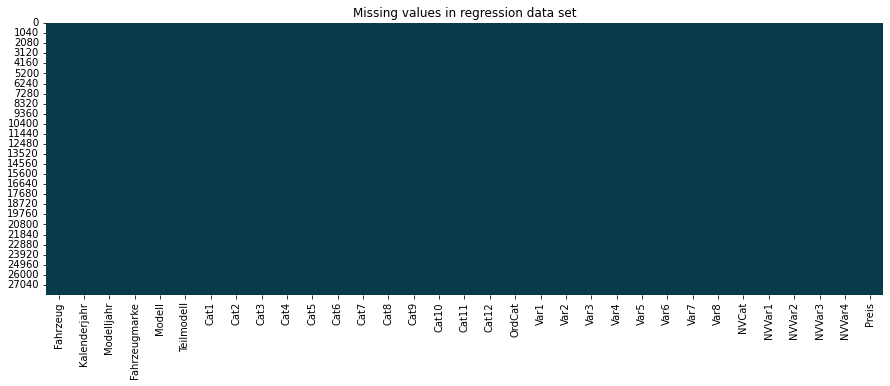

In [9]:
#checking for missing values:
print ("The total missing values in data",df.isnull().sum().sum())
#sum is 0 which indicates there are no misisng values in the training data.
#Feature engineering
f,(ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 5))
g1 = sns.heatmap(df.loc[:].isnull(), cmap = ['#073B4C', '#EF476F'], cbar = False, ax = ax1)
g1.set_title('Missing values in regression data set')
plt.draw()

In [10]:
# Check the columns types
df.dtypes

Fahrzeug           int64
Kalenderjahr       int64
Modelljahr         int64
Fahrzeugmarke     object
Modell            object
Teilmodell        object
Cat1              object
Cat2              object
Cat3              object
Cat4              object
Cat5              object
Cat6              object
Cat7              object
Cat8              object
Cat9              object
Cat10             object
Cat11             object
Cat12             object
OrdCat            object
Var1             float64
Var2             float64
Var3             float64
Var4             float64
Var5             float64
Var6             float64
Var7             float64
Var8             float64
NVCat             object
NVVar1           float64
NVVar2           float64
NVVar3           float64
NVVar4           float64
Preis            float64
dtype: object

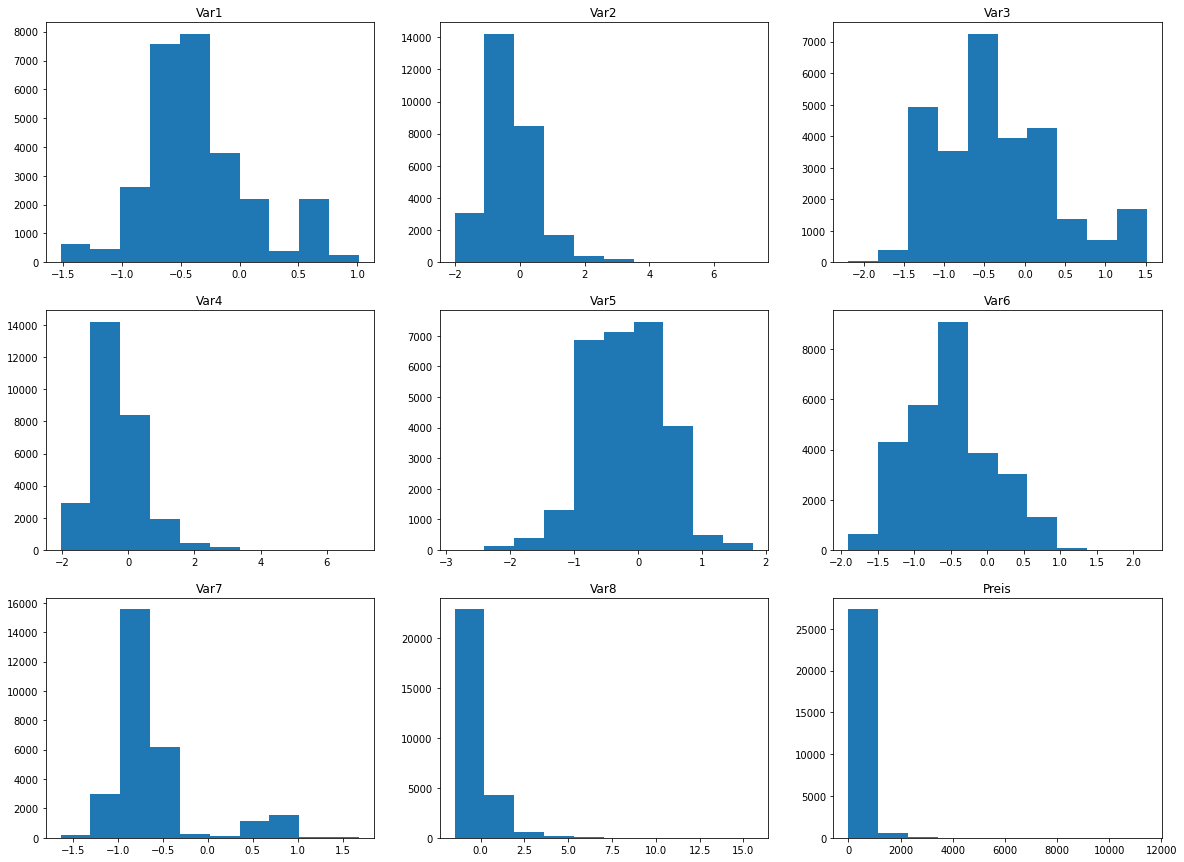

In [11]:
# Histograms
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 15))
ax[0, 0].hist(df['Var1'])
ax[0, 0].set_title('Var1')
ax[0, 1].hist(df['Var2'])
ax[0, 1].set_title('Var2')
ax[0, 2].hist(df['Var3'])
ax[0, 2].set_title('Var3')
ax[1, 0].hist(df['Var4'])
ax[1, 0].set_title('Var4')
ax[1, 1].hist(df['Var5'])
ax[1, 1].set_title('Var5')
ax[1, 2].hist(df['Var6'])
ax[1, 2].set_title('Var6')
ax[2, 0].hist(df['Var7'])
ax[2, 0].set_title('Var7')
ax[2, 1].hist(df['Var8'])
ax[2, 1].set_title('Var8')
ax[2, 2].hist(df['Preis'])
ax[2, 2].set_title('Preis')
plt.draw()

In [12]:
#Korrelation
corr_matrix = df.corr()
corr_matrix["Preis"].sort_values(ascending = False)

Preis           1.000000
Var4            0.024779
Var2            0.024449
Var6            0.020895
Var1            0.020510
Var3            0.019163
Var8            0.018003
Fahrzeug        0.017196
Var5            0.014559
Var7            0.008957
Modelljahr     -0.000953
NVVar1         -0.008569
NVVar4         -0.013564
Kalenderjahr   -0.036939
NVVar3         -0.045495
NVVar2         -0.048892
Name: Preis, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb76be81390>,
      dtype=object)

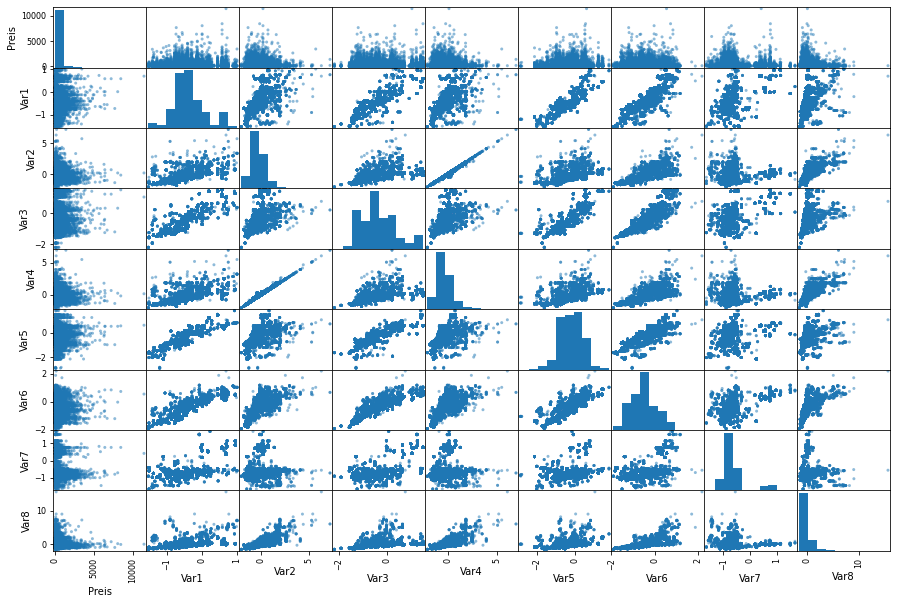

In [13]:
attributes_Var = ["Preis","Var1","Var2","Var3","Var4","Var5","Var6","Var7","Var8"]
scatter_matrix(df[attributes_Var],figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7615a9b50>,
      dtype=object)

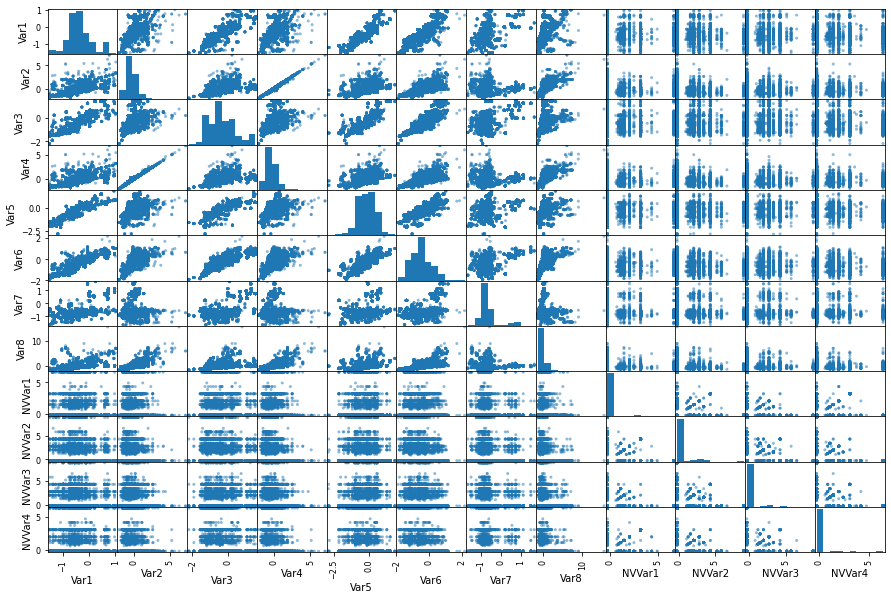

In [14]:
attributes_NVVar = ["Var1","Var2","Var3","Var4","Var5","Var6","Var7","Var8","NVVar1","NVVar2","NVVar3","NVVar4"]
scatter_matrix(df[attributes_NVVar],figsize=(15,10))

In [15]:
#creating 2 seperate dataframes for categorical and continuous features.
train_df_cat = pd.DataFrame()#training data frame with categorical features
train_df_cont = pd.DataFrame() #training data with continuous features
cat_list = []#list of categorical features
cont_list = []#list of continuous features

#populating the created data frames for categorical and continuous features
for each_column in df.columns:
    if df[each_column].dtype == 'float':
        cont_list.append(each_column)
cont_list.remove('Preis')
for each_column in df.columns:
    if df[each_column].dtype == 'object':
        cat_list.append(each_column)

for i in range(0,len(cat_list)):
    train_df_cat[i] = df[cat_list[i]]
train_df_cat.columns =cat_list
for i in range(0,len(cont_list)):
    train_df_cont[i] = df[cont_list[i]]
train_df_cont.columns =cont_list

In [16]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# Convert  attributes to string type columns
train_df_cat['OrdCat'] = train_df_cat['OrdCat'].astype('string')
enc_df = pd.DataFrame(enc.fit_transform(train_df_cat[cat_list]).toarray())
df_preis = df['Preis']
df = train_df_cont.join(enc_df)
df

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVVar1,NVVar2,NVVar3,NVVar4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,...,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896
0,-0.665897,-0.816152,-0.823407,-0.749192,-0.198358,-0.650165,-0.861623,-0.527934,-0.23153,2.783616,2.715490,-0.251419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.017076,1.777519,-0.013495,1.838605,0.330938,0.354617,-0.763322,3.412755,-0.23153,-0.266117,2.715490,-0.251419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.730177,-0.989063,-1.239933,-0.935242,-0.947698,-1.040848,-0.726459,-0.725062,-0.23153,-0.266117,-0.272337,1.408637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.320393,-0.643240,-0.337460,-0.698450,-0.025891,-0.431429,-0.959924,-0.441732,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.738212,-1.127392,-1.147371,-1.172034,-1.019064,-1.348482,-0.886198,-0.712263,-0.23153,2.783616,-0.272337,-0.251419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28074,0.587559,0.740051,1.236083,0.654646,0.527193,0.623650,0.760342,0.148447,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28075,-0.770352,-1.110101,-0.499442,-1.036724,-1.179637,-1.061902,-0.136654,-0.704277,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28076,-0.119519,0.221317,0.148487,0.231803,0.319043,-0.250124,-0.984499,-0.276548,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28077,-0.545372,-0.989063,-0.453161,-0.952156,-0.156728,-0.679407,-0.898486,-0.331463,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [17]:
#Scaling
mm_scale = preprocessing.MinMaxScaler(feature_range = (-1, 1))
df = mm_scale.fit_transform(df) 

In [ ]:
#dr = df_preis.copy()
#df_preis = df_preis.astype(int)

In [19]:
median = df_preis.median()

In [21]:
#df_preis = dr.copy()
df_preis = df_preis.astype(int)
for index, value in df_preis.items():
    if df_preis[index] < median: #Median:
        df_preis[index] = 0
    else:
        df_preis[index] = 1 #tobereplaced
df_preis = df_preis.astype(int)
df_preis[df_preis!=0].count(),df_preis[df_preis == 0].count()

(14039, 14040)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,df_preis,test_size = 0.3,random_state = 42)

In [ ]:
# PCA

In [24]:
pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train)
pca.n_components_

118

In [25]:
# Test Data
pca = PCA(n_components = 0.95)
X_test_reduced = pca.fit_transform(X_test)
X_train_reduced.shape,X_test_reduced.shape

((19655, 118), (8424, 118))

In [26]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 
d

118

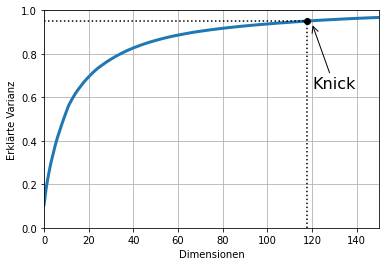

In [27]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 150, 0, 1])
plt.xlabel("Dimensionen")
plt.ylabel("Erklärte Varianz")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Knick", xy=(120, 0.94), xytext=(120, 0.64),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

In [28]:
X_train.shape,y_train.shape,X_train_reduced.shape

((19655, 909), (19655,), (19655, 118))

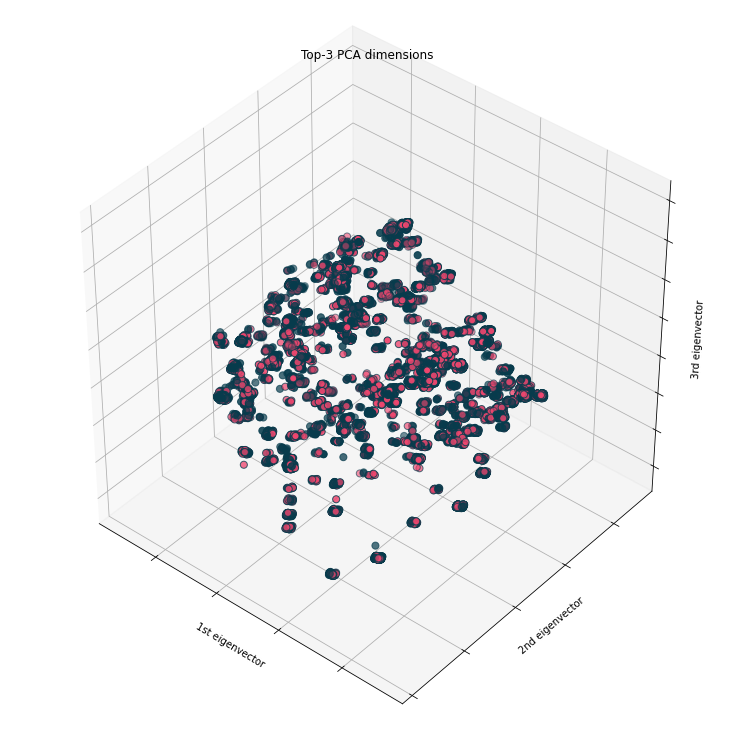

In [29]:
# Plot the result
owncmap = mc.ListedColormap(['#EF476F', '#FFD166', '#06D6A0', '#118AB2', '#F19143', '#073B4C'])
fig = plt.figure(1, figsize = (10, 10))
ax = Axes3D(fig, elev = -140, azim = 50)
ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:, 2],      # first three dimensions of PCA
           c = y_train,                                               # color-coded by label
           cmap = owncmap, edgecolor = '#073B4C', s = 50)
ax.set_title("Top-3 PCA dimensions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.draw()

In [30]:
#print(pca.explained_variance_)                                    # absolute values
print(pca.explained_variance_ratio_)

[1.06377831e-01 8.00429732e-02 5.87261208e-02 5.08287163e-02
 4.23511894e-02 4.11379043e-02 3.60946659e-02 3.15453741e-02
 3.05747296e-02 2.96578270e-02 2.80553736e-02 2.68939163e-02
 1.94165214e-02 1.83009005e-02 1.68581391e-02 1.53557613e-02
 1.35573684e-02 1.32773068e-02 1.29708235e-02 1.13795342e-02
 1.10179608e-02 1.03684086e-02 1.03024726e-02 9.14735184e-03
 8.95604666e-03 7.80428081e-03 7.36710808e-03 7.29729617e-03
 7.10926533e-03 6.61216080e-03 6.32984838e-03 6.20922134e-03
 5.84591520e-03 5.63087047e-03 5.33882357e-03 5.25783100e-03
 5.20791107e-03 5.04531298e-03 4.48208939e-03 4.36388571e-03
 4.07598485e-03 3.98841113e-03 3.93895591e-03 3.88940058e-03
 3.76302953e-03 3.51897746e-03 3.31159712e-03 3.24258089e-03
 3.11151103e-03 3.00042186e-03 2.92690681e-03 2.84770606e-03
 2.70528676e-03 2.66079635e-03 2.58386809e-03 2.51029745e-03
 2.40291390e-03 2.34766428e-03 2.20502626e-03 2.08900093e-03
 2.03660091e-03 1.99062529e-03 1.96947564e-03 1.90944246e-03
 1.89278889e-03 1.828695

#Modeling

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import  cross_val_score,cross_val_predict

In [56]:
rf_params = {'criterion': 'entropy', 
             'max_depth': 15, 
             'n_estimators': 22984, 
             'min_samples_leaf': 3, 
             'min_samples_split': 9, 
             'max_leaf_nodes': 239, 
             'random_state': 22}

dt_params = {'criterion': 'entropy', 
             'max_depth': 35, 
             'min_samples_leaf': 4, 
             'min_samples_split': 23, 
             'max_leaf_nodes': 169}

svc_params = {'kernel': 'poly',
              'degree': 3,
              'coef0' : 1,
              'C': 5 }

knn_params = {'weights': 'distance', 
              'n_neighbors': 32}

lr_params = {'multi_class':'multinomial',
             'class_weight': None, 
             'solver': 'saga', 
             'max_iter':10000}

In [57]:
models =    {'dt':DecisionTreeClassifier(**dt_params),
               'rf':RandomForestClassifier(**rf_params), 
               'svc':SVC(**svc_params), 
               'kn':KNeighborsClassifier(**knn_params),  
               'lr':LogisticRegression(**lr_params)}

model_abrv = {'dt':'Decision Tree Classifier', 
             'rf':'Random Forest Classifier',
              'svc':'Support Vector Machines',
              'kn':'K-Nearest Neighbors', 
              'lr':'Logistic Regression'}

In [58]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14, model='clf', save=True):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a seaborn heatmap. 
    Saves confusion matrix file to jpg file."""
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, ax=ax, fmt="d", cmap=plt.cm.Oranges)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t) 
#    if save == True:
#        plt.savefig('tuned_' + model_abrv[model] + '_confusion_matrix.jpg')
    plt.show()

In [59]:
def model(clf, X_train=X_train_reduced, X_test=X_test_reduced, y_train=y_train, y_test=y_test, models=models, save=False, print_stat=True, inc_train=False, cv=False):
    """Trains models and outputs score metrics. Takes an identifier, list of models, and split dataset as inputs and has options for saving model, 
    printing confusion matrix and classification report and getting cross-validated 5 fold accuracy."""
    clf_model = models[clf]
    clf_model.fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    if print_stat == True:
        clf_report = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True)).T
#        clf_report.to_csv('tuned_' + model_abrv[clf] + '_classification_report.csv')
        print(model_abrv[clf])
        print('\nTest Stats\n', classification_report(y_test,y_pred))
        print_confusion_matrix(confusion_matrix(y_test, y_pred), unique_labels(y_test, y_pred), model=clf)
        if inc_train == True:
            print(model_abrv[clf])
            print('\nTrain Stats\n', classification_report(y_train,clf_model.predict(X_train)))
            print_confusion_matrix(confusion_matrix(y_train, clf_model.predict(X_train)), unique_labels(y_test, y_pred), model=clf)
    if cv == True:
        print(model_abrv[clf] + ' CV Accuracy:',  
              np.mean(cross_val_score(clf_model, X_train, y_train, cv=5, scoring='accuracy')))
    if save == True:
        return clf_model

#Evaluation

In [ ]:
for key in models.keys():
    model(key, cv=True, print_stat=False)

Decision Tree Classifier CV Accuracy: 0.5136097685067413


Decision Tree Classifier

Test Stats
               precision    recall  f1-score   support

         0.0       0.51      0.54      0.52      4189
         1.0       0.51      0.48      0.50      4235

    accuracy                           0.51      8424
   macro avg       0.51      0.51      0.51      8424
weighted avg       0.51      0.51      0.51      8424



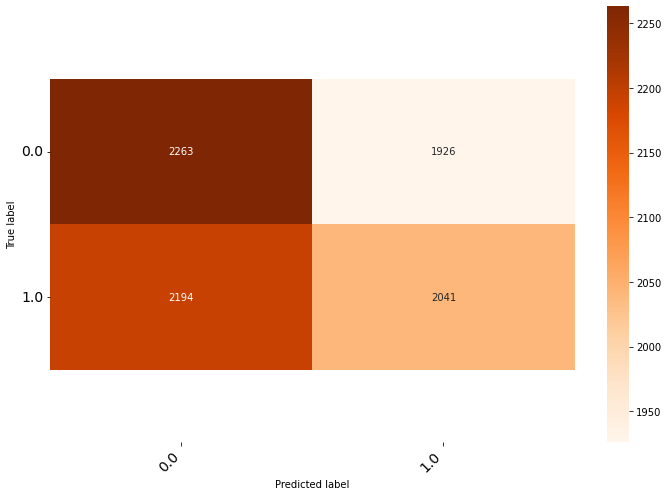

Decision Tree Classifier

Train Stats
               precision    recall  f1-score   support

         0.0       0.59      0.67      0.63      9851
         1.0       0.62      0.54      0.57      9804

    accuracy                           0.60     19655
   macro avg       0.60      0.60      0.60     19655
weighted avg       0.60      0.60      0.60     19655



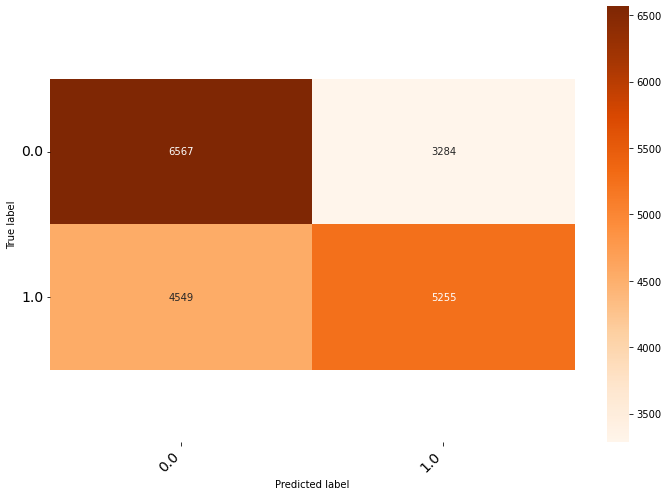

Random Forest Classifier

Test Stats
               precision    recall  f1-score   support

         0.0       0.52      0.53      0.52      4189
         1.0       0.53      0.52      0.52      4235

    accuracy                           0.52      8424
   macro avg       0.52      0.52      0.52      8424
weighted avg       0.52      0.52      0.52      8424



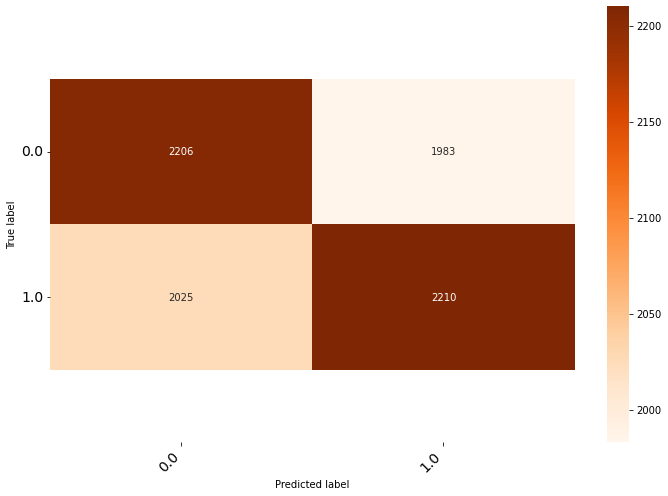

Random Forest Classifier

Train Stats
               precision    recall  f1-score   support

         0.0       0.79      0.78      0.78      9851
         1.0       0.78      0.79      0.79      9804

    accuracy                           0.79     19655
   macro avg       0.79      0.79      0.79     19655
weighted avg       0.79      0.79      0.79     19655



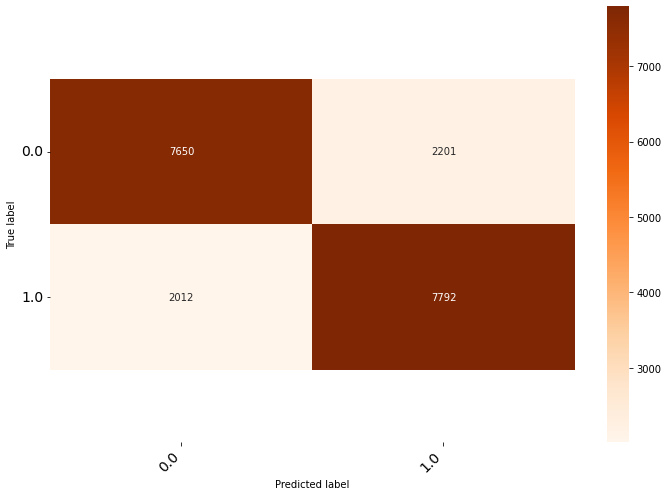

Support Vector Machines

Test Stats
               precision    recall  f1-score   support

         0.0       0.51      0.51      0.51      4189
         1.0       0.52      0.53      0.52      4235

    accuracy                           0.52      8424
   macro avg       0.52      0.52      0.52      8424
weighted avg       0.52      0.52      0.52      8424



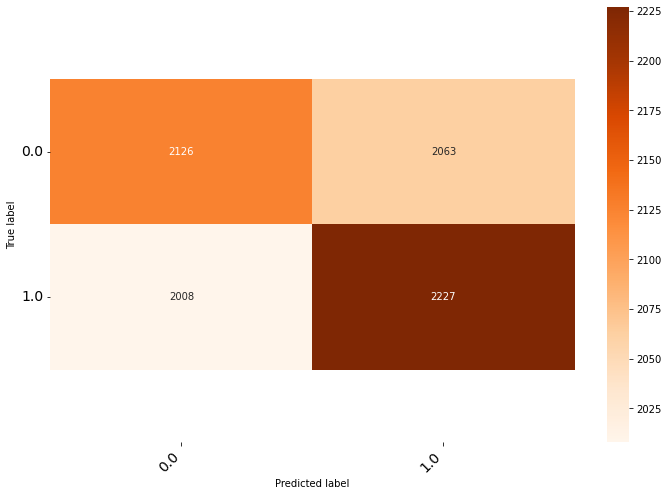

Support Vector Machines

Train Stats
               precision    recall  f1-score   support

         0.0       0.76      0.77      0.76      9851
         1.0       0.76      0.76      0.76      9804

    accuracy                           0.76     19655
   macro avg       0.76      0.76      0.76     19655
weighted avg       0.76      0.76      0.76     19655



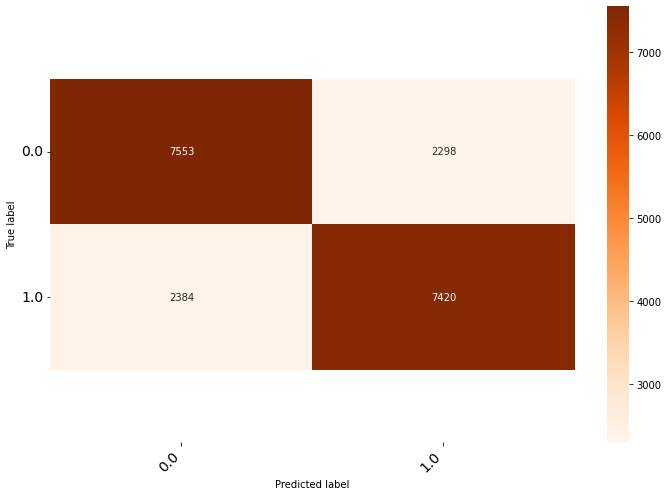

K-Nearest Neighbors

Test Stats
               precision    recall  f1-score   support

         0.0       0.50      0.49      0.50      4189
         1.0       0.51      0.53      0.52      4235

    accuracy                           0.51      8424
   macro avg       0.51      0.51      0.51      8424
weighted avg       0.51      0.51      0.51      8424



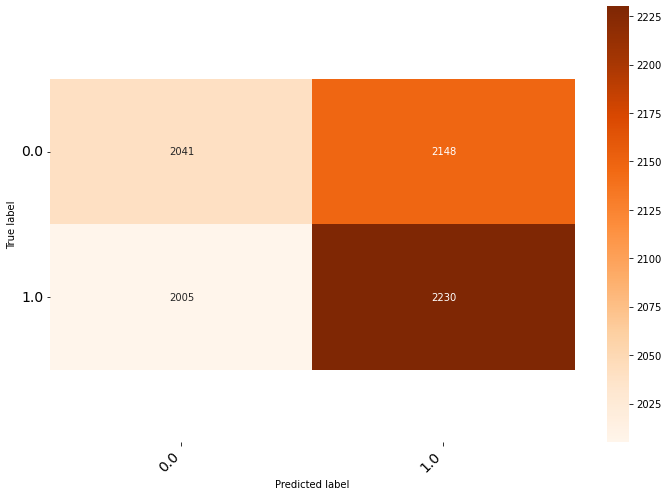

K-Nearest Neighbors

Train Stats
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      9851
         1.0       0.98      0.93      0.96      9804

    accuracy                           0.96     19655
   macro avg       0.96      0.96      0.96     19655
weighted avg       0.96      0.96      0.96     19655



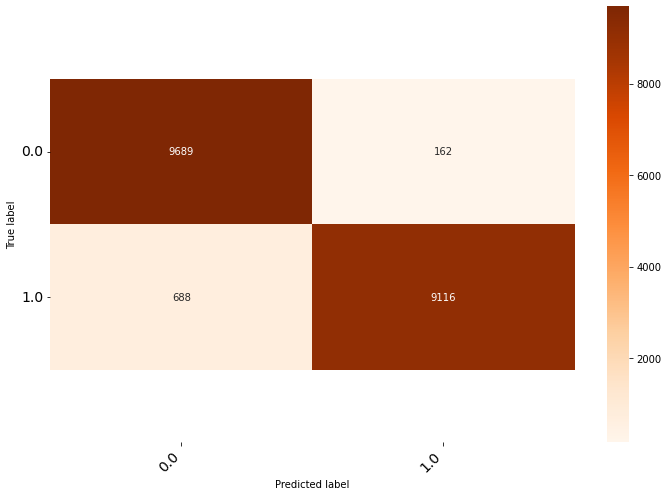

Logistic Regression

Test Stats
               precision    recall  f1-score   support

         0.0       0.52      0.53      0.52      4189
         1.0       0.52      0.51      0.52      4235

    accuracy                           0.52      8424
   macro avg       0.52      0.52      0.52      8424
weighted avg       0.52      0.52      0.52      8424



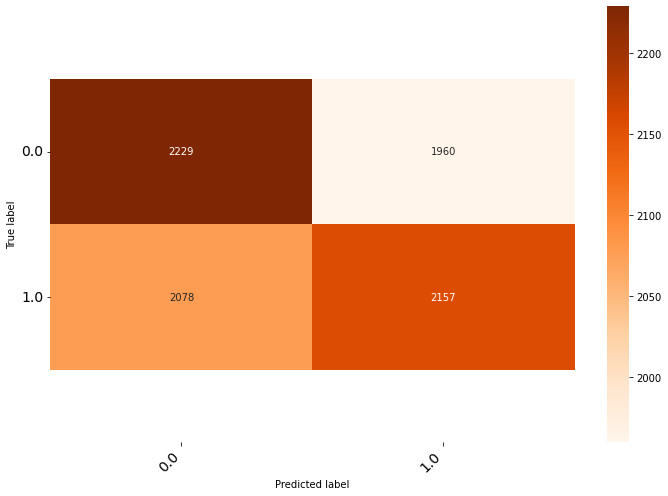

Logistic Regression

Train Stats
               precision    recall  f1-score   support

         0.0       0.55      0.54      0.55      9851
         1.0       0.55      0.55      0.55      9804

    accuracy                           0.55     19655
   macro avg       0.55      0.55      0.55     19655
weighted avg       0.55      0.55      0.55     19655



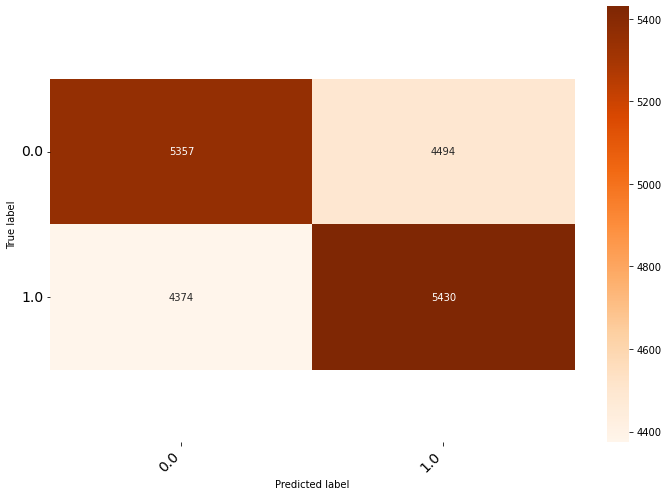

In [60]:
for key in models.keys():
    model(key, inc_train=True)

#Logistische Regression

In [32]:
log_reg = LogisticRegression(multi_class = 'ovr',
             class_weight = None, 
             solver= 'saga', 
             max_iter = 10000)

In [33]:
log_reg.fit(X_train_reduced,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_cla_pred = log_reg.predict(X_test_reduced)
log_reg.score(X_test_reduced, y_test)# Die Genauigkeit für den Testdatensatz

0.5206552706552706

In [35]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = d)),
    ("log_reg", LogisticRegression(multi_class = 'ovr',
             class_weight = None, 
             solver= 'saga', 
             max_iter = 10000)),
])

In [36]:
pipeline.fit(X_train,y_train)
pipeline.score(X_test, y_test)# Die Genauigkeit für den Testdatensatz

0.5160256410256411

In [37]:
probs = log_reg.predict_proba(X_test_reduced)
probs = probs[:,1]

In [38]:
y_probas_log_reg = cross_val_predict(log_reg,X_train_reduced, y_train,cv=3, method="predict_proba" )
probs_lr = y_probas_log_reg[:,1]

In [39]:
fpr, tpr, thresholds = roc_curve(y_train, probs_lr)

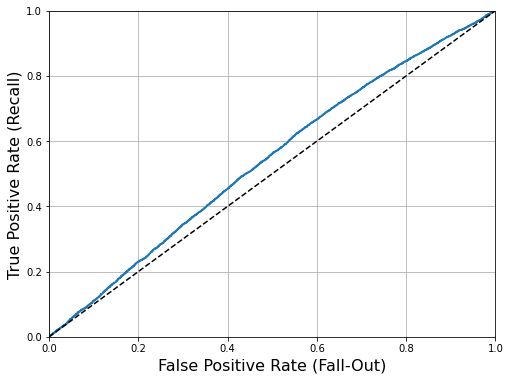

In [40]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.show()

# Neuronale Netze

In [41]:
from keras.models import Sequential
import keras
from keras.layers import Dense
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,SpatialDropout1D
from keras.models import Model
from tensorflow.keras import optimizers as optimizers
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
X_train = X_train_reduced.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test_reduced.astype('float32')
y_test = y_test.astype('float32')

In [43]:
x_traincnn = np.expand_dims(X_train, axis=(2))
x_testcnn = np.expand_dims(X_test, axis=(2))
x_traincnn.shape,x_testcnn.shape

((19655, 118, 1), (8424, 118, 1))

In [44]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(118,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(2)) # auf 2 setzen und neu trainieren
model.add(Activation('softmax'))
opt = optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 118, 128)          768       
_________________________________________________________________
activation (Activation)      (None, 118, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 118, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 14, 128)           82048     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 128)           0

In [46]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=["acc"])

In [47]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
1229/1229 [==============================] - 14s 10ms/step - loss: 0.6937 - acc: 0.5075 - val_loss: 0.6924 - val_acc: 0.5145
Epoch 2/100
1229/1229 [==============================] - 12s 10ms/step - loss: 0.6916 - acc: 0.5230 - val_loss: 0.6925 - val_acc: 0.5190
Epoch 3/100
1229/1229 [==============================] - 12s 10ms/step - loss: 0.6910 - acc: 0.5219 - val_loss: 0.6948 - val_acc: 0.5055
Epoch 4/100
1229/1229 [==============================] - 13s 10ms/step - loss: 0.6905 - acc: 0.5269 - val_loss: 0.6934 - val_acc: 0.5108
Epoch 5/100
1229/1229 [==============================] - 12s 10ms/step - loss: 0.6901 - acc: 0.5341 - val_loss: 0.6939 - val_acc: 0.5135
Epoch 6/100
1229/1229 [==============================] - 12s 10ms/step - loss: 0.6896 - acc: 0.5351 - val_loss: 0.6930 - val_acc: 0.5120
Epoch 7/100
1229/1229 [==============================] - 12s 10ms/step - loss: 0.6891 - acc: 0.5402 - val_loss: 0.6928 - val_acc: 0.5096
Epoch 8/100
1229/1229 [==================

In [48]:
loss, acc = model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

264/264 [==============================] - 2s 8ms/step - loss: 0.7101 - acc: 0.5197
Restored model, accuracy: 51.97%


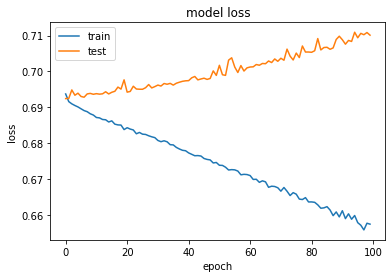

In [49]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

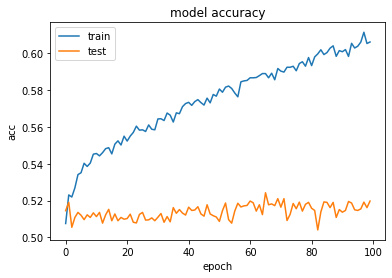

In [50]:
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix (Keras ResNet - Modell)',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
  #      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

 #   print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

308/308 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63      9851
         1.0       0.63      0.63      0.63      9804

    accuracy                           0.63     19655
   macro avg       0.63      0.63      0.63     19655
weighted avg       0.63      0.63      0.63     19655

Confusion matrix, without normalization


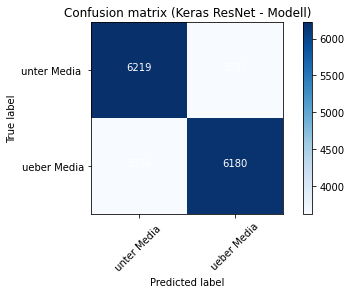

In [52]:
Preis = {0:'unter Media ', 1:'ueber Media'} 
class_names = [Preis[ind] for ind in range(len(Preis))]
y_pred_train = model.predict(x_traincnn, batch_size=64, verbose=1)
y_pred_b = np.argmax(y_pred_train, axis=1)

print(classification_report(y_train, y_pred_b))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_train, y_pred_b), classes=class_names)
plt.show()

132/132 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

         0.0       0.52      0.50      0.51      4189
         1.0       0.52      0.54      0.53      4235

    accuracy                           0.52      8424
   macro avg       0.52      0.52      0.52      8424
weighted avg       0.52      0.52      0.52      8424

Confusion matrix, without normalization


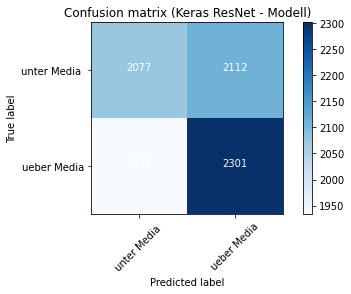

In [54]:
y_pred_test = model.predict(x_testcnn, batch_size=64, verbose=1)
y_pred_t = np.argmax(y_pred_test, axis=1)

print(classification_report(y_test, y_pred_t))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred_t), classes=class_names)
plt.show()

In [ ]:
#save